<a href="https://colab.research.google.com/github/shashankv05/Colab_Notebooks/blob/main/Stock_Price_Prediction_Using_Python_%26_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Description : LSTM(Long Short Term Memory)**
#### **LSTM CAN LOOK BACK IN MANY TIMESTEPS AND USE THAT INFORMATION TO MAKE GOOD PREDICTION ON WHAT IS GOING TO HAPPEN NEXT**
####**LSTM WORKS WELL WITH SEQUENTIAL PATTERNS**

In [ ]:
import math
import pandas_datareader as web
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [ ]:
df = web.DataReader('TSLA', data_source = 'yahoo', start = '2016-01-01', end = '2021-05-21' )

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,46.276001,43.799999,46.144001,44.681999,34135500.0,44.681999
2016-01-05,45.377998,44.000000,45.271999,44.686001,15934000.0,44.686001
2016-01-06,44.009998,43.195999,44.000000,43.807999,18895500.0,43.807999
2016-01-07,43.688000,42.734001,42.838001,43.130001,17771500.0,43.130001
2016-01-08,44.088001,42.153999,43.571999,42.200001,18140500.0,42.200001


In [ ]:
df.shape

(1356, 6)

Text(0, 0.5, 'Price in USD ($)')

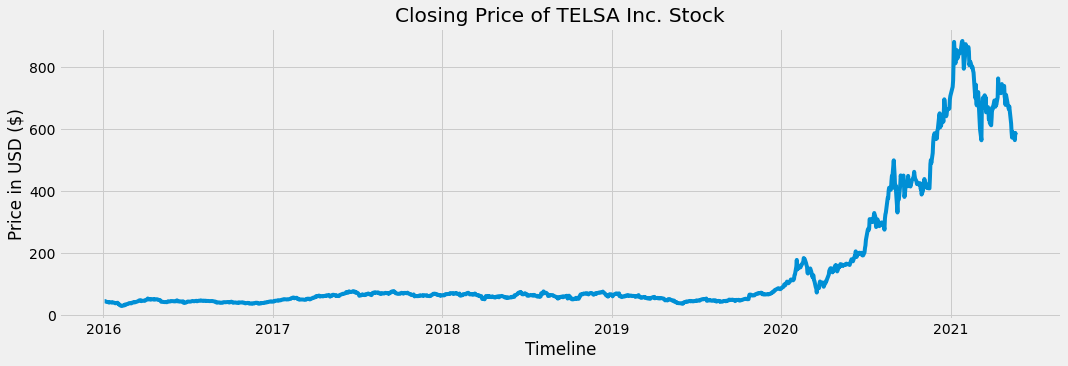

In [ ]:
# Let's visualise the closing price of Telsa Stock
plt.figure(figsize = (16, 5))
plt.title('Closing Price of TELSA Inc. Stock')
plt.plot(df.Close)
plt.xlabel('Timeline')
plt.ylabel('Price in USD ($)')
plt.show()

In [ ]:
# print(type(df.filter(['Close'])))
# print(type(df['Close'])) 

In [ ]:
# df['Close'].values
# df.filter(['Close']).values.shape
# type(df[['Low', 'Open', 'Close', 'Volume', 'Adj Close']])
# df.filter(regex = 'C')  # returns columns which has 'C' letter in it's name 

In [ ]:
data = df.filter(['Close'])  # Create a new dataframe with only Close Column
dataset = data.values # Convert the  dataframe to numpy array
dataset[0:10]

array([[44.68199921],
       [44.68600082],
       [43.80799866],
       [43.13000107],
       [42.20000076],
       [41.56999969],
       [41.99399948],
       [40.06200027],
       [41.23600006],
       [40.9980011 ]])

In [ ]:
print(dataset.shape)
print(dataset[0], dataset[0][0])

(1356, 1)
[44.68199921] 44.68199920654297


In [ ]:
print(len(dataset))
print(len(dataset) * 0.8)
print(math.ceil(len(dataset) * 0.8))
# 
train_data_len = math.ceil(len(dataset) * 0.8)
# test_data_len  len(dataset) - train_data_len


1356
1084.8
1085


**Scale the data : It always important to apply (transformation / normalization) that is kind of preprocess the input data, before the data is presented to Neural Network.**

**Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such
that it is in the given range on the training set, e.g. between
zero and one.**

In [ ]:
scaler = MinMaxScaler(feature_range= (0, 1))
scaler


MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaled_data = scaler.fit_transform(dataset)
scaled_data
#scaled_data[: , 0]    
#scaled_data[: , 0].shape
# scaled_data[0, 0]

array([[0.01866669],
       [0.01867137],
       [0.0176437 ],
       ...,
       [0.62588196],
       [0.65317738],
       [0.64627156]])

In [ ]:
# scaled_data[scaled_data < 1].shape
# type(scaled_data)
scaled_data.shape

(1356, 1)

In [ ]:
# scaled_data[0:train_data_len, :].shape
# scaled_data[0:train_data_len].shape

In [ ]:
train_data = scaled_data[0:train_data_len] 
train_data.shape

(1085, 1)

In [ ]:
#  Here, We are considering last 60 days data for prediction of price

print(train_data[60 - 60 : 60, 0], end = "\n\n") # x_train[0]
print(train_data[60, 0], end = "\n\n")  # y_train[0]
print(train_data[61 - 60 : 61, 0], end = "\n\n")  #x_train[1]
print(train_data[61, 0], end = "\n\n")    #y_train[1]

print(train_data[(len(train_data) - 1) - 60 : len(train_data) - 1, 0], end ="\n\n")               
print(train_data[(len(train_data) - 1) , 0])

[0.01866669 0.01867137 0.0176437  0.01685012 0.01576158 0.01502418
 0.01552046 0.01325911 0.01463324 0.01435467 0.01429147 0.01288222
 0.01317952 0.01378348 0.01233912 0.01167897 0.01039379 0.01077537
 0.01112651 0.01247021 0.00915543 0.00697836 0.00741143 0.00443141
 0.00101129 0.00107215 0.         0.00159184 0.00172528 0.00269209
 0.0058547  0.00540758 0.00536311 0.0079756  0.00785153 0.00827056
 0.01024397 0.01092519 0.0112974  0.00999115 0.010457   0.0121893
 0.01343    0.0144249  0.01379519 0.01522784 0.01439915 0.01494225
 0.01673307 0.01747983 0.01832023 0.01936195 0.02085079 0.02215704
 0.02120193 0.01847239 0.01968266 0.02027024 0.02023981 0.01948134]

0.02015553089929533

[0.01867137 0.0176437  0.01685012 0.01576158 0.01502418 0.01552046
 0.01325911 0.01463324 0.01435467 0.01429147 0.01288222 0.01317952
 0.01378348 0.01233912 0.01167897 0.01039379 0.01077537 0.01112651
 0.01247021 0.00915543 0.00697836 0.00741143 0.00443141 0.00101129
 0.00107215 0.         0.00159184 0.0017

In [ ]:
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i - 60 : i, 0])
  y_train.append(train_data[i, 0])

In [ ]:
len(x_train), len(y_train)

(1025, 1025)

In [ ]:
# Let's see the x_train and y_train Data
index = 0
for x, y in zip(x_train, y_train):
  print("Index: ", index, end = "\n\n")
  print("x_train:")
  print(x, end = "\n\n")
  print("y_train:")
  print(y)
  print()
  index+=1
  if index == 2:
    break

Index:  0

x_train:
[0.01866669 0.01867137 0.0176437  0.01685012 0.01576158 0.01502418
 0.01552046 0.01325911 0.01463324 0.01435467 0.01429147 0.01288222
 0.01317952 0.01378348 0.01233912 0.01167897 0.01039379 0.01077537
 0.01112651 0.01247021 0.00915543 0.00697836 0.00741143 0.00443141
 0.00101129 0.00107215 0.         0.00159184 0.00172528 0.00269209
 0.0058547  0.00540758 0.00536311 0.0079756  0.00785153 0.00827056
 0.01024397 0.01092519 0.0112974  0.00999115 0.010457   0.0121893
 0.01343    0.0144249  0.01379519 0.01522784 0.01439915 0.01494225
 0.01673307 0.01747983 0.01832023 0.01936195 0.02085079 0.02215704
 0.02120193 0.01847239 0.01968266 0.02027024 0.02023981 0.01948134]

y_train:
0.02015553089929533

Index:  1

x_train:
[0.01867137 0.0176437  0.01685012 0.01576158 0.01502418 0.01552046
 0.01325911 0.01463324 0.01435467 0.01429147 0.01288222 0.01317952
 0.01378348 0.01233912 0.01167897 0.01039379 0.01077537 0.01112651
 0.01247021 0.00915543 0.00697836 0.00741143 0.00443141 0.

In [ ]:
#  Convert the x_train and y_train to numpys arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape, y_train.shape

((1025, 60), (1025,))

In [ ]:
#  We need to Reshape the Data for our LSTM model as LSTM expects 3 Dimensional Data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
x_train.shape

(1025, 60, 1)

In [ ]:
# Building LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences= True , input_shape = (x_train.shape[1], 1)))  # 50 Neurons, return_sequences = True as we will create another Layer
                                                                                # input_shape(Number of timesteps which is 60 here, Number of features(1))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))         # Output Neuron                                                                  

In [ ]:
# Compiling the Model
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [ ]:
# Training the Model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1025/1025 [==============================] - 25s 22ms/step - loss: 3.0960e-04


Test Data

In [ ]:
train_data_len

1085

In [ ]:
test_data = scaled_data[train_data_len - 60 :]                # (1025 , 1355)         

In [ ]:
test_data.shape                              

(331, 1)

In [ ]:
dataset[train_data_len:].shape

(271, 1)

In [ ]:
x_test = []
y_test = dataset[train_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [ ]:
#  Convert x_test to numpy array
x_test = np.array(x_test)

In [ ]:
x_test.shape

(271, 60)

In [ ]:
x_test[0]

array([0.11637772, 0.11866247, 0.14896132, 0.17402347, 0.13835684,
       0.14169504, 0.14148668, 0.14692001, 0.14764572, 0.14598597,
       0.15457959, 0.15365023, 0.16731431, 0.18113057, 0.17691454,
       0.17728674, 0.16155325, 0.15362213, 0.1486804 , 0.12531778,
       0.12274041, 0.14044496, 0.14088741, 0.14182143, 0.13597845,
       0.13104841, 0.10869707, 0.11743581, 0.11483737, 0.09758929,
       0.09432835, 0.07055607, 0.06707508, 0.05092725, 0.0664758 ,
       0.06645005, 0.06803253, 0.08458535, 0.09260308, 0.09000698,
       0.08677647, 0.0839135 , 0.08903314, 0.07909817, 0.07275655,
       0.07873533, 0.08721657, 0.09405446, 0.09484804, 0.10050377,
       0.11875143, 0.13254895, 0.1372168 , 0.14081718, 0.14284911,
       0.14108639, 0.12712498, 0.13775053, 0.13155172, 0.13612124])

In [ ]:
#  Reshape the data for our LSTM Model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
x_test[0]

[[0.11637772]
 [0.11866247]
 [0.14896132]
 [0.17402347]
 [0.13835684]
 [0.14169504]
 [0.14148668]
 [0.14692001]
 [0.14764572]
 [0.14598597]
 [0.15457959]
 [0.15365023]
 [0.16731431]
 [0.18113057]
 [0.17691454]
 [0.17728674]
 [0.16155325]
 [0.15362213]
 [0.1486804 ]
 [0.12531778]
 [0.12274041]
 [0.14044496]
 [0.14088741]
 [0.14182143]
 [0.13597845]
 [0.13104841]
 [0.10869707]
 [0.11743581]
 [0.11483737]
 [0.09758929]
 [0.09432835]
 [0.07055607]
 [0.06707508]
 [0.05092725]
 [0.0664758 ]
 [0.06645005]
 [0.06803253]
 [0.08458535]
 [0.09260308]
 [0.09000698]
 [0.08677647]
 [0.0839135 ]
 [0.08903314]
 [0.07909817]
 [0.07275655]
 [0.07873533]
 [0.08721657]
 [0.09405446]
 [0.09484804]
 [0.10050377]
 [0.11875143]
 [0.13254895]
 [0.1372168 ]
 [0.14081718]
 [0.14284911]
 [0.14108639]
 [0.12712498]
 [0.13775053]
 [0.13155172]
 [0.13612124]]


In [ ]:
# Predicting the Price Values
predictions = model.predict(x_test)

In [ ]:
predictions = scaler.inverse_transform(predictions)   #Undo the Scaling

In [ ]:
predictions.shape

(271, 1)

In [ ]:
# Getting the Accuracy
root_mean_square_error = np.sqrt(np.mean(predictions - y_test) ** 2)

In [ ]:
root_mean_square_error

5.780712564053131

### **Chart**

In [ ]:
plt_train_data = data[:train_data_len]
validation_data = data[train_data_len:]
validation_data['Predictions'] = predictions    # pd.set_option('chained_assignment',None)

In [ ]:
validation_data.shape, plt_train_data.shape

((271, 2), (1085, 1))

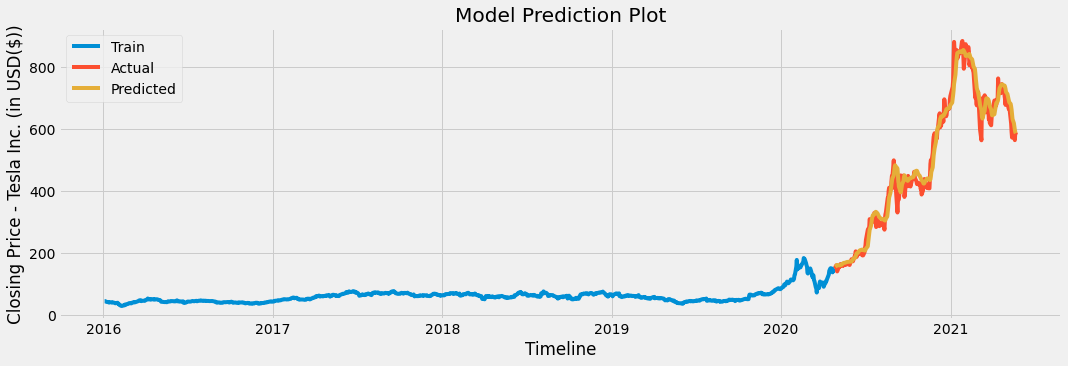

In [ ]:
plt.figure(figsize=(16, 5))
plt.title('Model Prediction Plot')
plt.xlabel('Timeline')
plt.ylabel('Closing Price - Tesla Inc. (in USD($))')
plt.plot(plt_train_data['Close'])
plt.plot(validation_data[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predicted'], loc = 'upper left')

In [ ]:
validation_data[abs(validation_data['Predictions'] - validation_data['Close']) > 40].shape

(58, 2)